In [1]:
import pandas as pd
rtt_trace_orig = pd.read_csv('Data/Autobahn/RTT_Loss_Bridges.csv')
rtt_trace = rtt_trace_orig.copy()
rtt_trace.loc[(rtt_trace["nearest_bridge_line_distance"] > 25), 'nearest_bridge_id'] = None
rtt_trace.loc[rtt_trace['lost'] == True, 'time'] = -1
rtt_trace["timestamp"] = pd.to_datetime(rtt_trace["timestamp"])
#rtt_trace.dropna(subset=["time"], inplace=True)
rtt_trace.loc[(rtt_trace['nearest_bridge_id'] == 20) & (rtt_trace.index <= 253215), 'nearest_bridge_id'] = None
rtt_trace.loc[(rtt_trace['nearest_bridge_id'] == 98) & (rtt_trace.index <= 13084), 'nearest_bridge_id'] = None
#rtt_trace.loc[rtt_trace['nearest_bridge_id'] == 20] = None

rtt_trace = rtt_trace.dropna(subset=['nearest_bridge_id'])
rtt_trace['nearest_bridge_id'] = rtt_trace['nearest_bridge_id'].astype(int)


bridge_data = pd.read_csv("Data/Autobahn/Bridges.csv", sep=";")
bridge_data['Breite'] = bridge_data['Breite'].str.replace(',', '.').astype(float)
bridge_data['Laenge'] = bridge_data['Laenge'].str.replace(',', '.').astype(float)

# only use the samples collected on the autobahn
startdate = pd.to_datetime("2024-04-19 18:51:00")
enddate = pd.to_datetime("2024-04-19 20:11:00")
rtt_trace = rtt_trace[(rtt_trace["timestamp"] >= startdate) & (rtt_trace["timestamp"] <= enddate)]


#tt_trace.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)
#rtt_trace.to_csv("data/RTT_Loss_Bridges2.csv")


In [2]:
len(rtt_trace['nearest_bridge_id'].unique())

98

In [3]:
import pandas as pd
rtt_trace_orig = rtt_trace.copy()
rtt_trace_orig.loc[rtt_trace_orig['lost'] == True, 'time'] = -1

rtt_trace_orig

,timestamp,destination_IP,icmp_seq,ttl,time,lost,Time(sec),Latitude,Longitude,Horizontal Accuracy(m),...,Speed(m/s),Average Speed(m/s),Course(deg),True Heading(deg),Magnetic Heading(deg),Heading Accuracy(deg),Speed(km/h),nearest_bridge_distance,nearest_bridge_id,nearest_bridge_line_distance
16025,2024-04-19 18:51:28.955883008,100.64.0.1,17847,64,28.3,False,199.460595,53.179046,7.293383,4.739214,...,18.027292,17.858423,205.514343,131.505081,128.342377,18.275023,64.898250,27.517382,98,24.973308
16026,2024-04-19 18:51:28.963913984,100.64.0.1,17848,64,24.0,False,199.468599,53.179045,7.293382,4.739215,...,18.028368,17.877150,205.514343,131.505081,128.342377,18.275023,64.902123,27.392557,98,24.830253
16027,2024-04-19 18:51:28.980323584,100.64.0.1,17849,64,-1.0,True,199.484608,53.179043,7.293380,4.739217,...,18.030519,17.914603,205.514343,131.505081,128.342377,18.275023,64.909869,27.143461,98,24.544144
16028,2024-04-19 18:51:28.996733440,100.64.0.1,17850,64,-1.0,True,199.501616,53.179040,7.293378,4.739220,...,18.032805,17.954397,205.514343,131.505081,128.342377,18.275023,64.918099,26.879626,98,24.240152
16029,2024-04-19 18:51:29.013143040,100.64.0.1,17851,64,-1.0,True,199.517628,53.179038,7.293377,4.739184,...,18.044294,17.961419,205.514343,131.505081,128.342377,18.275023,64.959459,26.619465,98,23.940917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389400,2024-04-19 20:10:02.830723072,100.64.0.1,63542,64,25.6,False,4913.392600,52.269001,7.980923,4.797418,...,23.976111,23.750882,87.327492,91.173073,88.010033,10.000000,86.314000,25.544944,0,23.727595
389401,2024-04-19 20:10:02.844016128,100.64.0.1,63543,64,28.9,False,4913.405599,52.269001,7.980928,4.797345,...,23.979504,23.755272,87.327492,91.173073,88.010033,10.000000,86.326215,25.849201,0,24.036648
389402,2024-04-19 20:10:02.857671936,100.64.0.1,63544,64,31.4,False,4913.419599,52.269001,7.980933,4.797266,...,23.983158,23.760000,87.327492,91.173073,88.010033,10.000000,86.339370,26.177078,0,24.369474
389403,2024-04-19 20:10:02.870685952,100.64.0.1,63545,64,29.7,False,4913.432598,52.269001,7.980937,4.797192,...,23.986551,23.764390,87.327492,91.173073,88.010033,10.000000,86.351585,26.481729,0,24.678527


In [4]:
grouped_bridges = rtt_trace.groupby('nearest_bridge_id')
bridge_list = [group for _, group in grouped_bridges]
#bridge_list

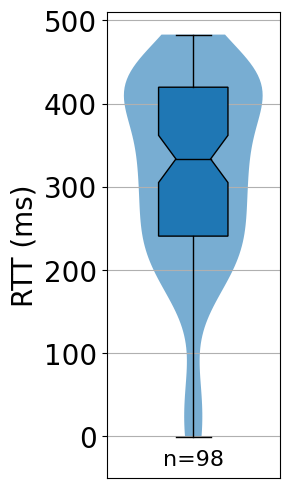

In [5]:
"""Fig. 10b - Max RTT Boxplot"""
import matplotlib.pyplot as plt

boxplot_data = []
for bridge in bridge_list:
    boxplot_data.append(bridge["time"].max())
    
fig, ax = plt.subplots(figsize=(3, 5))

# Create the Violin Plots
violin_parts = ax.violinplot(boxplot_data, widths=0.8, showmeans=False, showmedians=False, showextrema=False)

# Set the colors for the violin plot
cmap = plt.get_cmap("tab10")
violin_colors = [cmap(i) for i in range(len(boxplot_data))]
for pc, color in zip(violin_parts['bodies'], violin_colors):
    pc.set_facecolor(color)
#    pc.set_edgecolor('black')
    pc.set_alpha(0.6)  # Adjust transparency if needed


box = ax.boxplot(boxplot_data, widths=0.4, notch=True, patch_artist=True)
cmap = plt.get_cmap("tab10")
colors = [cmap(0), cmap(1), cmap(2)]
# Set colors for each box plot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
# Set median line colors to black
for median in box['medians']:
    median.set(color='black')
    ax.text(1, -40, f'n={len(boxplot_data)}', ha='center', va='bottom', fontsize=16, color='black')


#ax.set_yscale("log")
y_ticks = [0, 100, 200, 300, 400, 500]
fzsize = 20
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)
#plt.yticks(y_ticks, [str(tick) for tick in y_ticks])
plt.ylim(-50, 510)
ax.set_ylabel('RTT (ms)', size=fzsize)
ax.tick_params(axis='x', which='both', length=0)
plt.xticks([])
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("Plots/Fig10b.pdf", format="pdf")

-0.1318088496044255 0.5561122199112651


/tmp/ipykernel_64291/1303124965.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bridge0['Adjusted Distance to Bridge'] = bridge0['nearest_bridge_line_distance']


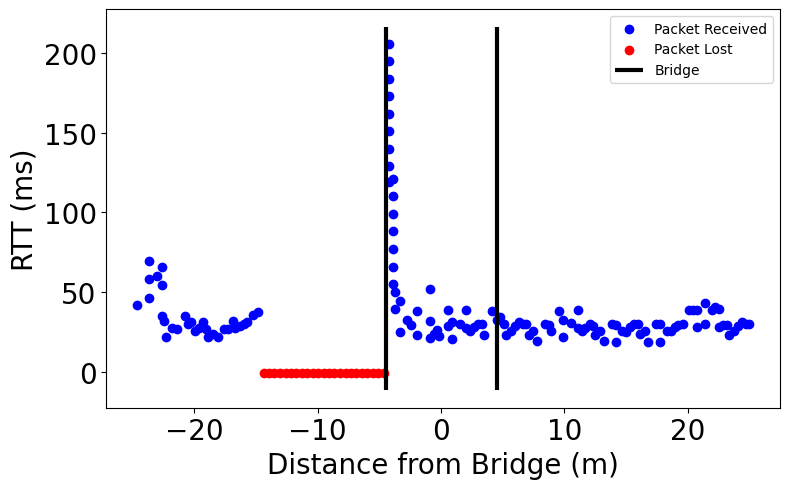

In [6]:
"""Fig. 10a - RTT and Loss mapped on a single bridge"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

bridge_id = 0 

bridge_width = bridge_data.iloc[bridge_id]["Breite"]/2
left_bridge_border = 0 - bridge_width
right_bridge_border = 0 + bridge_width

bridge0 = rtt_trace[rtt_trace["nearest_bridge_id"] == bridge_id]
# Find the index of the minimum distance (closest point to the bridge)
min_distance_index = bridge0['nearest_bridge_line_distance'].idxmin()

# Split the distances into "before" and "after" the minimum distance index
bridge0['Adjusted Distance to Bridge'] = bridge0['nearest_bridge_line_distance']
bridge0.loc[:min_distance_index, 'Adjusted Distance to Bridge'] *= -1

# Find the minimum negative distance and minimum positive distance
max_negative_distance = bridge0[bridge0["Adjusted Distance to Bridge"] < 0]["Adjusted Distance to Bridge"].max()
min_positive_distance = bridge0[bridge0["Adjusted Distance to Bridge"] > 0]["Adjusted Distance to Bridge"].min()
print(max_negative_distance, min_positive_distance)
fig, ax = plt.subplots(figsize=(8, 5))

fzsize=20
ax.scatter(bridge0[bridge0["lost"] == False]["Adjusted Distance to Bridge"], bridge0[bridge0["lost"] == False]["time"], color="blue", label="Packet Received")
ax.scatter(bridge0[bridge0["lost"] == True]["Adjusted Distance to Bridge"], bridge0[bridge0["lost"] == True]["time"], color="red", label="Packet Lost")
#ax.scatter(bridge0_lost["Distance(m)"], bridge0_lost["time"], color="red", label="Packet Lost")
ax.set_ylabel('RTT (ms)', size=fzsize)
ax.set_xlabel('Distance from Bridge (m)', size=fzsize)
ymin, ymax = ax.get_ylim()
ax.vlines([left_bridge_border, right_bridge_border], linewidth=3, ymin=ymin, ymax=ymax, color="black", label="Bridge")
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)
plt.legend()
plt.tight_layout()

plt.savefig("Plots/Fig10a.pdf", format="pdf")

In [7]:
# extract burst len and rtt2norm for each bridge
grouped = rtt_trace.sort_values('timestamp').reset_index(drop=True)

med_std = rtt_trace['time'].median() + rtt_trace['time'].std()

def get_peak_data(df, bid):
    df = df[df['nearest_bridge_id']==bid]
    peaktime_id = df['time'].idxmax()
    peak_time = df['time'].max()
    peak_timestamp = df.loc[df['time'] == peak_time, 'timestamp'].iloc[0]
    if peak_time == -1:
        return [bid, -1]

    # get id of loss end
    wcounter = 1
    loss = True
    while loss != False and peaktime_id - wcounter in df.index:
        loss = df.loc[peaktime_id-wcounter, 'lost']
        wcounter += 1
        
    counter_until_norm = 0
    for rtt in df.loc[df['timestamp'] > peak_timestamp, 'time']:
        #print(f'Bridge: {bid}, RTT: {rtt}, Norm: {med_std}')
        if rtt >= med_std:
            counter_until_norm+=1
        else:
            break
    return [bid,peaktime_id, int(wcounter), int(counter_until_norm)]

counts_until_norm = []

for group in grouped.groupby('nearest_bridge_id'):
      if len(group[1]['nearest_bridge_id'].unique()) == 1:
          bridge_id = group[1]['nearest_bridge_id'].unique()[0]
          counts_until_norm.append(get_peak_data(group[1], bridge_id))

counts_until_norm = pd.DataFrame(counts_until_norm, columns=['bid', 'peakid', 'losscount', 'rtt2norm'])

rtt_trace_clean = pd.DataFrame()
# Iterate over each row in counts_until_norm
for _, row in counts_until_norm.iterrows():
    bridge_id = row['bid']
    start = row['peakid'] - row['losscount']
    end = row['peakid'] + row['rtt2norm']
    
    # Filter rtt_trace for this bridge_id within the specified index range
    filtered_samples = grouped[
        (grouped['nearest_bridge_id'] == bridge_id) & 
        (grouped.index >= start) & 
        (grouped.index <= end)
    ]
    
    # Append filtered samples to rtt_trace_clean
    rtt_trace_clean = pd.concat([rtt_trace_clean, filtered_samples], ignore_index=True)

# Show the resulting DataFrame
print(rtt_trace_clean)

                         timestamp destination_IP  icmp_seq  ttl   time  \
0    2024-04-19 20:10:01.191395072     100.64.0.1     63414   64   35.5   
1    2024-04-19 20:10:01.207278848     100.64.0.1     63415   64   37.5   
2    2024-04-19 20:10:01.225934848     100.64.0.1     63416   64   -1.0   
3    2024-04-19 20:10:01.244590592     100.64.0.1     63417   64   -1.0   
4    2024-04-19 20:10:01.263246592     100.64.0.1     63418   64   -1.0   
...                            ...            ...       ...  ...    ...   
3841 2024-04-19 18:51:30.162471936     100.64.0.1     17944   64  163.0   
3842 2024-04-19 18:51:30.162492928     100.64.0.1     17945   64  152.0   
3843 2024-04-19 18:51:30.162512896     100.64.0.1     17946   64  141.0   
3844 2024-04-19 18:51:30.162540032     100.64.0.1     17947   64  130.0   
3845 2024-04-19 18:51:30.162558976     100.64.0.1     17948   64  119.0   

       lost    Time(sec)   Latitude  Longitude  Horizontal Accuracy(m)  ...  \
0     False  4911.75

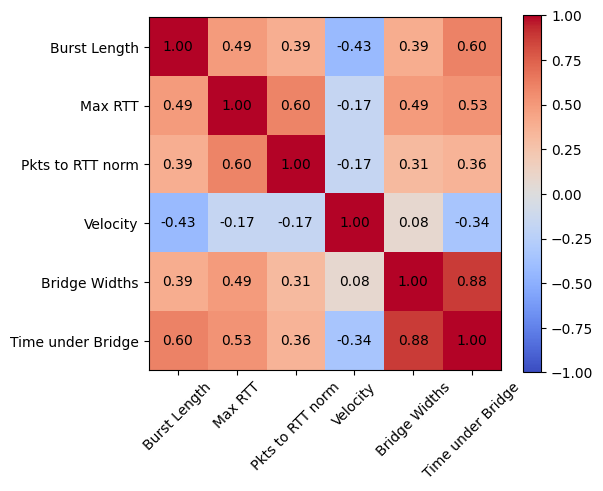

In [8]:
"""Fig. 11 - Correlation Matrix"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bridge_IDs = rtt_trace_clean["nearest_bridge_id"].unique().astype(int)
bridge_IDs = np.flip(bridge_IDs)

burst_lengths = []
bridge_widths = []
max_rtts = []
times_under_bridge = []
velocities = []
packets_until_norm = []

for BID in bridge_IDs:
    b_width = bridge_data.iloc[BID]["Breite"]
    bridge_widths.append(b_width)
    half_b_width = b_width/2
    temp_df = rtt_trace_clean[rtt_trace_clean["nearest_bridge_id"] == BID]
    lost_df = temp_df[temp_df["lost"] == True]
    burst_lengths.append(lost_df.shape[0])
    max_rtts.append(temp_df["time"].max())
    velocity = temp_df["Speed(m/s)"].median()
    tub = b_width / velocity
    velocities.append(velocity)
    times_under_bridge.append(tub)
    packets_until_norm.append(counts_until_norm[counts_until_norm['bid'] == BID]['rtt2norm'].values[0])

#print(burst_lengths)
corr_df = pd.DataFrame({"Burst Length":burst_lengths, "Max RTT":max_rtts, "Pkts to RTT norm":packets_until_norm, "Velocity":velocities, "Bridge Widths":bridge_widths, "Time under Bridge":times_under_bridge})
#corr_df_filtered = corr_df[(corr_df["Burst Length"] > 0) & (corr_df["Max RTT"] > 0)]
corr_df_filtered = corr_df[corr_df["Max RTT"] >= 0]
corr_matrix = corr_df_filtered.corr()
corr_matrix
# Plot the correlation matrix using Matplotlib
plt.figure(figsize=(6.1, 5))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)

# Annotate the heatmap
for (i, j), val in np.ndenumerate(corr_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.tight_layout()
#plt.title('Correlation Matrix')
plt.savefig("Plots/Fig11.pdf", format="pdf")
